In [1]:
import numpy as np
import pandas as pd

import time

import tensorflow_decision_forests as tfdf

2023-04-13 14:47:09.291344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# load training data

train_starting_time = time.time()
train_df = pd.read_csv('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_train.csv', nrows = 100000)
train_load_time = time.time()-train_starting_time
print(f'Loaded training sample of {len(train_df)} jets in {train_load_time:.3f}s')

# load testing data

test_starting_time = time.time()
test_df = pd.read_csv('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_test.csv', nrows = 25000)
test_load_time = time.time()-test_starting_time
print(f'Loaded testing sample of {len(test_df)} jets in {test_load_time:.3f}s')


Loaded training sample of 100000 jets in 8.594s
Loaded testing sample of 25000 jets in 2.486s


In [2]:
def load_tfds(data_path: str, nrows_: int = None, name:str = None, label_: str = 'class'):
   start_time = time.time()
   df = pd.read_csv(data_path, nrows = nrows_)
   ds = tfdf.keras.pd_dataframe_to_tf_dataset(df, label=label_)
   load_time = time.time()-start_time

   if name is not None:
      print(f'Loaded {name} sample of {len(df)} jets in {load_time:.3f}s')

   return ds

In [6]:
train_ds = load_tfds('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_train.csv', name='training', nrows_=1000)
test_ds = load_tfds('../Data/jet_images_c16_pt0_jedinet_sort_hpT_pcNone_test.csv', name='testing', nrows_=250)

Loaded training sample of 1000 jets in 1.114s
Loaded testing sample of 250 jets in 0.654s


In [5]:
'''
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df_renamed = df.rename(columns={"A": "a", "B": "c"})
print(df)
print('\n-------\n')
print(df_renamed)
'''

'\ndf = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})\ndf_renamed = df.rename(columns={"A": "a", "B": "c"})\nprint(df)\nprint(\'\n-------\n\')\nprint(df_renamed)\n'

In [6]:
'''
for i in range(int((train_df.shape[1] - 1)/16)):
    train_df = train_df.rename(columns={f"c{i}_cos(theta)":f"c{i}_cos_theta", f"c{i}_cos(theta_rel)":f"c{i}_cos_theta_rel"})

for i in range(int((test_df.shape[1] - 1)/16)):
    test_df = test_df.rename(columns={f"c{i}_cos(theta)":f"c{i}_cos_theta", f"c{i}_cos(theta_rel)":f"c{i}_cos_theta_rel"})
'''    

'\nfor i in range(int((train_df.shape[1] - 1)/16)):\n    train_df = train_df.rename(columns={f"c{i}_cos(theta)":f"c{i}_cos_theta", f"c{i}_cos(theta_rel)":f"c{i}_cos_theta_rel"})\n\nfor i in range(int((test_df.shape[1] - 1)/16)):\n    test_df = test_df.rename(columns={f"c{i}_cos(theta)":f"c{i}_cos_theta", f"c{i}_cos(theta_rel)":f"c{i}_cos_theta_rel"})\n'

In [7]:
# train_ds['c0_cos_theta']

In [8]:
'''
# convert training and testing dataframes to tensorflow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='class')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='class')
'''

"\n# convert training and testing dataframes to tensorflow datasets\ntrain_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='class')\ntest_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label='class')\n"

In [9]:
BDT_hyperparameters={'num_trees':5,
             'shrinkage':0.2,
             'subsample':0.3,
             'use_hessian_gain':True,
             'growing_strategy':'BEST_FIRST_GLOBAL',
             'max_depth':-1,
             'max_num_nodes':32
            }

In [10]:
# define the model
model = tfdf.keras.GradientBoostedTreesModel(**BDT_hyperparameters)

Use /var/folders/w6/ywy355d53p1fqw8pn8ng6xn80000gn/T/tmpwdk908d6 as temporary training directory


In [11]:
#train the model
starting_time = time.time()
model.fit(train_ds, verbose = 1)
training_time = time.time() - starting_time

Reading training dataset...
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:11.397169. Found 1000 examples.
Training model...


2023-04-03 09:36:08.249152: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1790] "goss_alpha" set but "sampling_method" not equal to "GOSS".
2023-04-03 09:36:08.249180: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1800] "goss_beta" set but "sampling_method" not equal to "GOSS".
2023-04-03 09:36:08.249192: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1814] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
2023-04-03 09:36:08.272857: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:452] Default loss set to MULTINOMIAL_LOG_LIKELIHOOD
2023-04-03 09:36:08.274326: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:484] The model configuration specifies 5 trees but computation of the validation loss will o

Model trained in 0:00:04.384265
Compiling model...


2023-04-03 09:36:12.461994: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1518] 	num-trees:5 train-loss:0.844832 train-accuracy:0.780065 valid-loss:1.295878 valid-accuracy:0.532468
2023-04-03 09:36:12.462175: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1568] Create final snapshot of the model at iteration 5
2023-04-03 09:36:12.472427: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:242] Insufficient number of trees to apply early stopping. Using last loss for metrics.
2023-04-03 09:36:12.472456: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:309] Final model num-trees:0 valid-loss:1.295878 valid-accuracy:0.532468
[INFO 2023-04-03T09:36:12.553207+02:00 kernel.cc:1214] Loading model from path /var/folders/w6/ywy355d53p1fqw8pn8ng6xn80000gn/T/tmpwdk908d6/model/ with prefix dcc0e9ddf

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [13]:
model.GetVariableImportance()

AttributeError: 'GradientBoostedTreesModel' object has no attribute 'GetVariableImportance'

In [12]:
model.save('Models/BDT_name_test')

INFO:tensorflow:Assets written to: Models/BDT_name_test/assets


INFO:tensorflow:Assets written to: Models/BDT_name_test/assets


In [2]:
inspector = tfdf.inspector.make_inspector("Models/Binary_class/small_tests/BDT_c50_hpT_pct_agg_10000/assets/")

In [92]:
inspector.variable_importances()['INV_MEAN_MIN_DEPTH']

[("pT_sum" (1; #821), 0.17522816166883964),
 ("Delta_R_mean" (1; #0), 0.12765957446808512),
 ("pT_rel_sum" (1; #820), 0.1153054221002059),
 ("Delta_R_sum" (1; #1), 0.11122144985104268),
 ("c1_phi_rot" (1; #195), 0.0995850622406639),
 ("c0_Delta_R" (1; #7), 0.09494207403221247),
 ("E_sum" (1; #5), 0.09492866224042945),
 ("c44_phi_rel" (1; #626), 0.09348914858096828),
 ("c7_phi_rot" (1; #771), 0.0932297447280799),
 ("c49_eta_rel" (1; #701), 0.09308768527496881),
 ("c30_Delta_R" (1; #375), 0.09191629052113254),
 ("c1_eta_rel" (1; #189), 0.09190371991247265),
 ("c4_eta_rel" (1; #717), 0.09141613385933887),
 ("c19_phi_rot" (1; #179), 0.09109394062627083),
 ("c2_phi_rot" (1; #371), 0.0908230842005676),
 ("c1_Delta_R" (1; #183), 0.09074949358541524),
 ("c2_eta_rel" (1; #365), 0.09070049939263058),
 ("c26_phi_rel" (1; #306), 0.09054163298302342),
 ("c32_phi_rot" (1; #419), 0.09004421814283801),
 ("cos_theta_rel_mean" (1; #808), 0.08988764044943819),
 ("c4_Delta_R" (1; #711), 0.0894568690095846

In [8]:
feature_list_SUM_SCORE = [inspector.variable_importances()['SUM_SCORE'][i][0][0] for i in range(len(inspector.variable_importances()['SUM_SCORE']))]

In [16]:
feature_list_SUM_SCORE.index('c0_pT')

111

In [17]:
feature_list_SUM_SCORE[126]

'c5_Delta_R'

In [5]:
feature_labels = [
        "px",
        "py",
        "pz",
        "E",
        "E_rel",
        "pT",
        "pT_rel",
        "eta",
        "eta_rel",
        "eta_rot",
        "phi",
        "phi_rel",
        "phi_rot",
        "Delta_R",
        "cos_theta",
        "cos_theta_rel"
    ]

full_agg_features = [
    "mean",
    "sum"
]

nb_constituents = 50
nb_full_agg_features = 2
nb_additional_features = 1

In [127]:
new_feature_rankings  = np.zeros((len(feature_labels)+ 1, nb_constituents + nb_full_agg_features + 1))

for feature_index in range(len(feature_labels)):
    for constituent_index in range(nb_constituents):
        try:
            score_index = feature_list_SUM_SCORE.index(f'c{constituent_index}_{feature_labels[feature_index]}')
            new_feature_rankings[feature_index][constituent_index] = inspector.variable_importances()['SUM_SCORE'][score_index][1]
            print(f'c{constituent_index}_{feature_labels[feature_index]} was found')

        except:
            print(f'c{constituent_index}_{feature_labels[feature_index]} was not found')
            continue

    for full_agg_index in range(nb_full_agg_features):
        try:
            score_index = feature_list_SUM_SCORE.index(f'{feature_labels[feature_index]}_{full_agg_features[full_agg_index]}')
            new_feature_rankings[feature_index][full_agg_index + nb_constituents] = inspector.variable_importances()['SUM_SCORE'][score_index][1]
            print(f'{feature_labels[feature_index]}_{full_agg_features[full_agg_index]} was found')

        except:
            print(f'{feature_labels[feature_index]}_{full_agg_features[full_agg_index]} was not found')
            continue

    try:
        score_index = feature_list_SUM_SCORE.index(f'nb_constituents')
        new_feature_rankings[len(feature_labels)+1][nb_full_agg_features + nb_constituents] = inspector.variable_importances()['SUM_SCORE'][score_index][1]
        print(f'nb_constituents was found')

    except:
        print(f'nb_constituents was not found')
        continue

print(new_feature_rankings)

c0_px was found
c1_px was found
c2_px was not found
c3_px was not found
c4_px was found
c5_px was not found
c6_px was not found
c7_px was not found
c8_px was found
c9_px was not found
c10_px was found
c11_px was not found
c12_px was not found
c13_px was not found
c14_px was not found
c15_px was not found
c16_px was not found
c17_px was not found
c18_px was not found
c19_px was not found
c20_px was not found
c21_px was not found
c22_px was not found
c23_px was not found
c24_px was found
c25_px was not found
c26_px was not found
c27_px was not found
c28_px was not found
c29_px was not found
c30_px was not found
c31_px was not found
c32_px was not found
c33_px was found
c34_px was not found
c35_px was not found
c36_px was not found
c37_px was found
c38_px was not found
c39_px was not found
c40_px was not found
c41_px was not found
c42_px was not found
c43_px was not found
c44_px was not found
c45_px was not found
c46_px was not found
c47_px was not found
c48_px was not found
c49_px was no

In [128]:
feature_rankings  = np.zeros((len(feature_labels), nb_constituents))
full_agg_feature_rankings = np.zeros((len(feature_labels), nb_full_agg_features))

for feature_index in range(len(feature_labels)):
    for constituent_index in range(nb_constituents):
        try:
            score_index = feature_list_SUM_SCORE.index(f'c{constituent_index}_{feature_labels[feature_index]}')
            feature_rankings[feature_index][constituent_index] = inspector.variable_importances()['SUM_SCORE'][score_index][1]
            print(f'c{constituent_index}_{feature_labels[feature_index]} was found')

        except:
            print(f'c{constituent_index}_{feature_labels[feature_index]} was not found')
            continue

    for full_agg_index in range(nb_full_agg_features):
        try:
            score_index = feature_list_SUM_SCORE.index(f'{feature_labels[feature_index]}_{full_agg_features[full_agg_index]}')
            full_agg_feature_rankings[feature_index][full_agg_index] = inspector.variable_importances()['SUM_SCORE'][score_index][1]
            print(f'{feature_labels[feature_index]}_{full_agg_features[full_agg_index]} was found')

        except:
            print(f'{feature_labels[feature_index]}_{full_agg_features[full_agg_index]} was not found')
            continue

c0_px was found
c1_px was found
c2_px was not found
c3_px was not found
c4_px was found
c5_px was not found
c6_px was not found
c7_px was not found
c8_px was found
c9_px was not found
c10_px was found
c11_px was not found
c12_px was not found
c13_px was not found
c14_px was not found
c15_px was not found
c16_px was not found
c17_px was not found
c18_px was not found
c19_px was not found
c20_px was not found
c21_px was not found
c22_px was not found
c23_px was not found
c24_px was found
c25_px was not found
c26_px was not found
c27_px was not found
c28_px was not found
c29_px was not found
c30_px was not found
c31_px was not found
c32_px was not found
c33_px was found
c34_px was not found
c35_px was not found
c36_px was not found
c37_px was found
c38_px was not found
c39_px was not found
c40_px was not found
c41_px was not found
c42_px was not found
c43_px was not found
c44_px was not found
c45_px was not found
c46_px was not found
c47_px was not found
c48_px was not found
c49_px was no

In [129]:
feature_rankings==0

array([[False, False,  True,  True, False,  True,  True,  True, False,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True, False,  True, False,  True, False,  True, False,
         True, False, False, False, False, False,  True,  True,  True,
         True,  True, False,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True, False,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tr

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
['mean', 'sum']


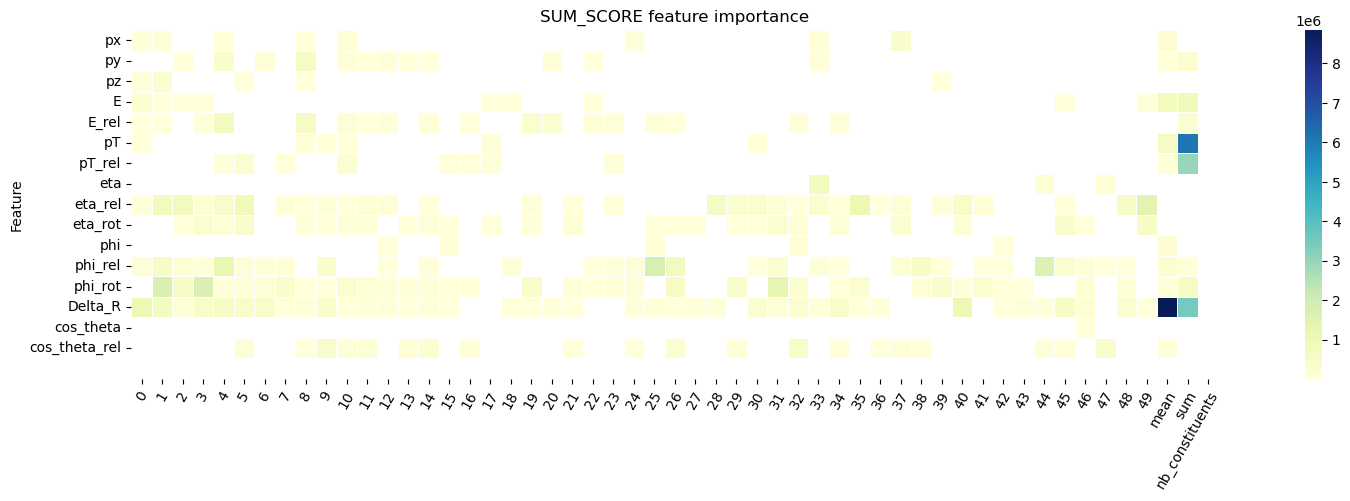

In [131]:
# xlabels = [str(i) for i in np.arange(nb_constituents)]

xlabels = np.arange(nb_constituents)
print(xlabels)
print(full_agg_features)
xlabels = np.concatenate((xlabels, full_agg_features))

plt.subplots(figsize=(18.75,5))
ax = sns.heatmap(new_feature_rankings, linewidth=0.5, cmap="YlGnBu", yticklabels = feature_labels, xticklabels = np.append(xlabels, 'nb_constituents'), mask = new_feature_rankings == 0, square  = True)
ax.set(ylabel = 'Feature', title='SUM_SCORE feature importance')
plt.setp(ax.get_xticklabels()[-3:], rotation=60, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_xticklabels()[:-3], rotation=60)
plt.tight_layout()
# plt.xticks(rotation=45, ha="right")
# plt.savefig('Plots/SUM_SCORE_test.pdf')
plt.show()


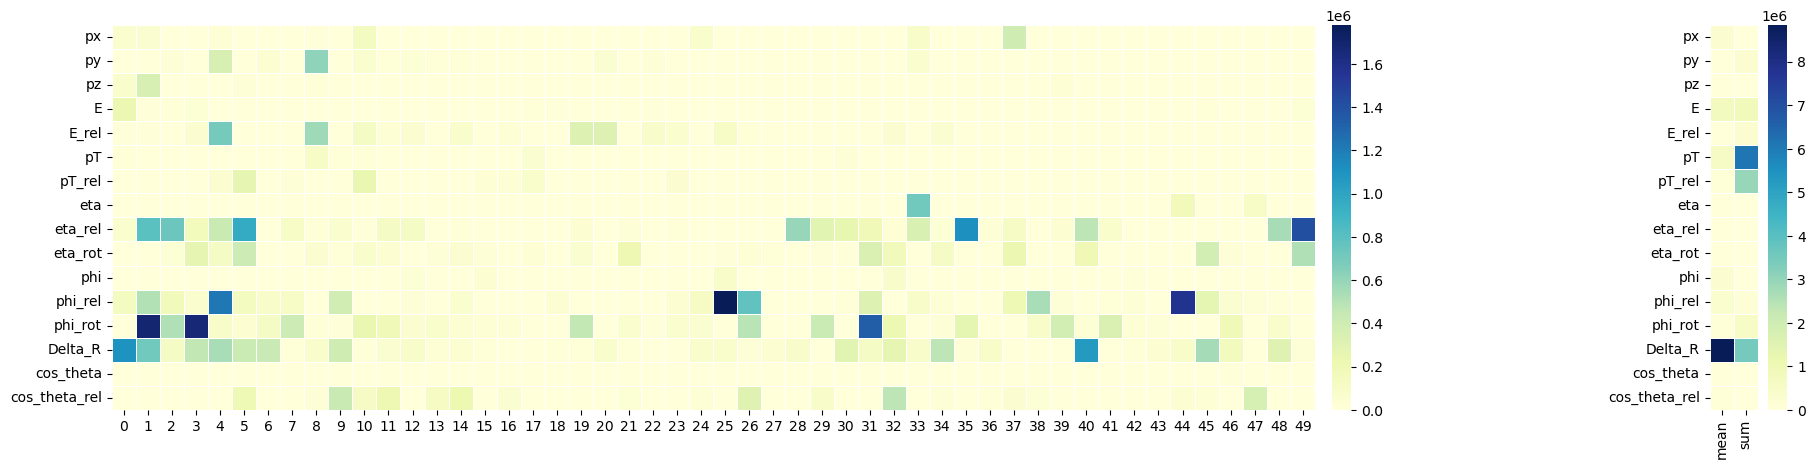

In [91]:
fig = plt.figure(figsize=(25,5))
ax1, ax2 = fig.subplots(ncols=2, width_ratios=(50,6))


ax1.margins(x=0)
ax2.margins(x=0)
sns.heatmap(feature_rankings, ax=ax1, cmap="YlGnBu", cbar_kws={"orientation": "vertical", "pad":0.01}, linewidth=0.5, yticklabels = feature_labels, square = True)
# sns.heatmap(feature_rankings, ax=ax1, cmap="YlGnBu", cbar = False, linewidth=0.5, yticklabels = feature_labels, square = True)
sns.heatmap(full_agg_feature_rankings, ax=ax2,  cmap="YlGnBu", linewidth=0.5, yticklabels = feature_labels, xticklabels=full_agg_features, square = True)
fig.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot2grid((20,20), (0,0), colspan=19, rowspan=19)
ax2 = plt.subplot2grid((20,20), (19,0), colspan=19, rowspan=1)
ax3 = plt.subplot2grid((20,20), (0,19), colspan=1, rowspan=19)

mask = np.zeros_like(pv)
mask[np.tril_indices_from(mask)] = True

sns.heatmap(pv, ax=ax1, annot=True, cmap="YlGnBu",mask=mask, linecolor='b', cbar = False)
ax1.xaxis.tick_top()
ax1.set_xticklabels(pv.columns,rotation=40)

sns.heatmap((pd.DataFrame(pv.sum(axis=0))).transpose(), ax=ax2,  annot=True, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False)
sns.heatmap(pd.DataFrame(pv.sum(axis=1)), ax=ax3,  annot=True, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False)

<Axes: >

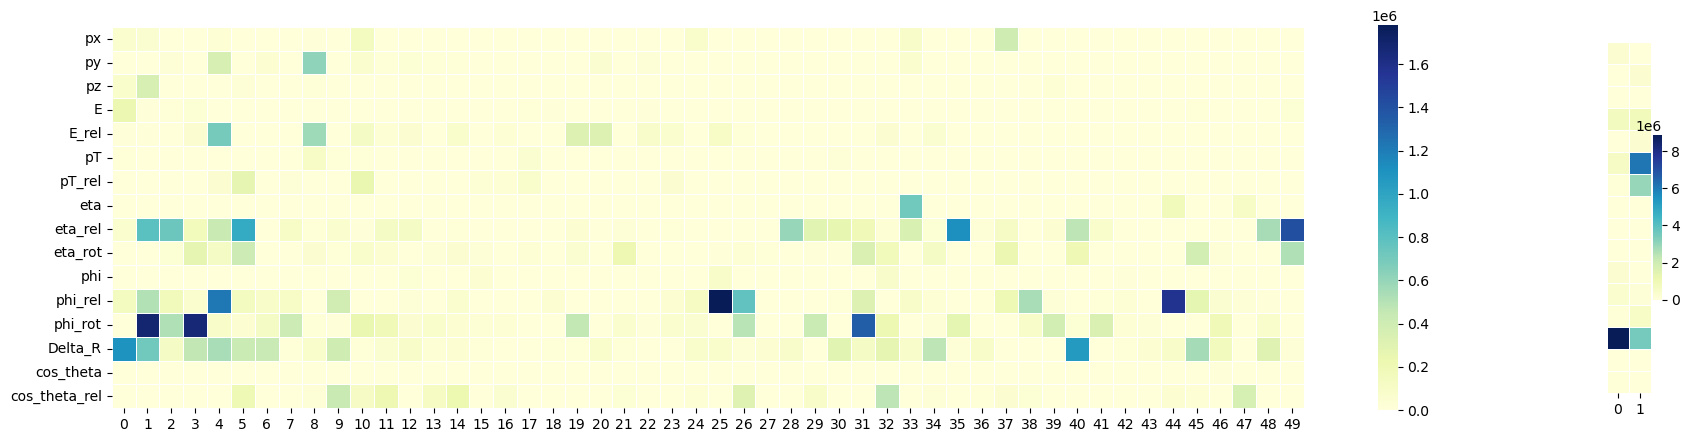

In [30]:

fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot2grid((16,52), (0,0), colspan=50, rowspan=16)
ax2 = plt.subplot2grid((16,52), (0,50), colspan=2, rowspan=16)

sns.heatmap(feature_rankings, ax=ax1, cmap="YlGnBu", linewidth=0.5, yticklabels = feature_labels, square = True)

sns.heatmap(full_agg_feature_rankings, ax=ax2,  cmap="YlGnBu", linewidth=0.5, yticklabels = False, square = True)

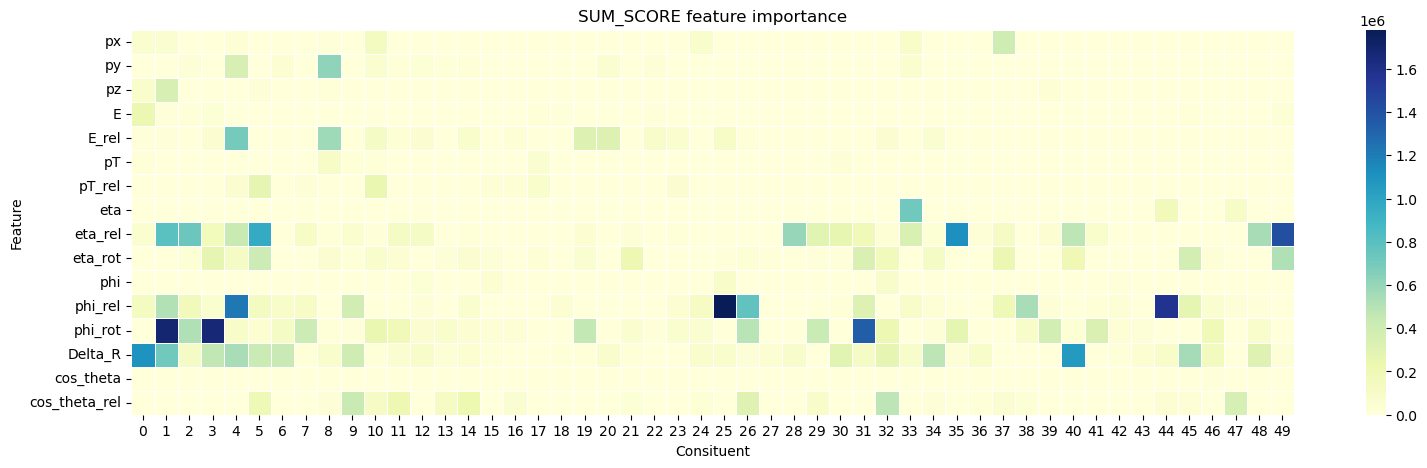

In [44]:
plt.subplots(figsize=(18.75,5))
ax = sns.heatmap(feature_rankings, linewidth=0.5, cmap="YlGnBu", yticklabels = feature_labels)
ax.set(xlabel='Consituent', ylabel = 'Feature', title='SUM_SCORE feature importance')
# plt.savefig('Plots/SUM_SCORE_test.pdf')
plt.show()

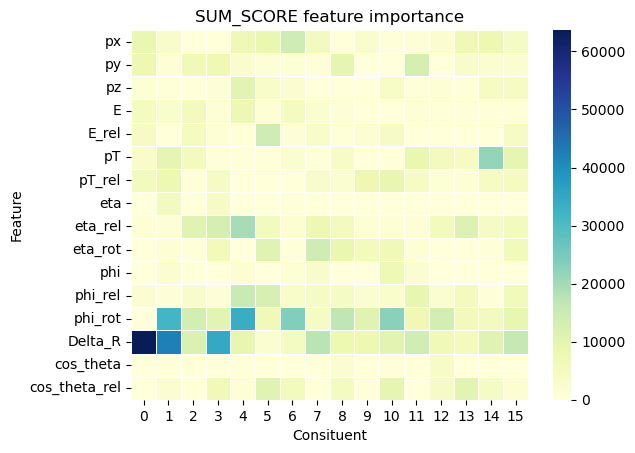

In [26]:
ax = sns.heatmap(feature_rankings, linewidth=0.5, cmap="YlGnBu", yticklabels = feature_labels)
ax.set(xlabel='Consituent', ylabel = 'Feature', title='SUM_SCORE feature importance')
plt.savefig('Plots/SUM_SCORE_test.pdf')
plt.show()

In [28]:
from prepare_data_BDT import select_feature_labels

select_feature_labels('jedinet')

['px',
 'py',
 'pz',
 'E',
 'E_rel',
 'pT',
 'pT_rel',
 'eta',
 'eta_rel',
 'eta_rot',
 'phi',
 'phi_rel',
 'phi_rot',
 'Delta_R',
 'cos_theta',
 'cos_theta_rel']

In [32]:
len(inspector.features())

256

In [35]:
type(feature_rankings)

numpy.ndarray

In [103]:
# model_path = "Models/BDT_name_test/"
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
from prepare_data_BDT import select_feature_labels
import seaborn as sns

def get_2d_importances(model_path: str, variable_importance:str, feature_choice: str = 'jedinet') -> np.ndarray:
    feature_list = select_feature_labels(feature_choice)

    inspector_path = os.path.join(model_path, "assets")
    inspector = tfdf.inspector.make_inspector(inspector_path)

    nb_features = len(feature_list)
    # print(f'features per constituent: {nb_features}')
    nb_constituents = int(len(inspector.features())/nb_features)
    # print(f'total features: {len(inspector.features())}')
    # print(f'constituents per jet: {nb_constituents}')
    
    feature_importance_dict = {i[0][0]: i[1] for i in inspector.variable_importances()[variable_importance]}

    feature_importances  = np.zeros((nb_features, nb_constituents))
    for feature_index in range(nb_features):
        for constituent_index in range(nb_constituents):
            try:
                feature_importances[feature_index][constituent_index] = feature_importance_dict[f'c{constituent_index}_{feature_list[feature_index]}']
                # print(f'c{constituent_index}_{feature_list[feature_index]} was found')

            except:
                # print(f'c{constituent_index}_{feature_list[feature_index]} was not found')
                continue
    
    return feature_importances

def plot_importances(model_path: str, variable_importance:str, feature_choice: str = 'jedinet', cmap: str = "YlGnBu",
                     save_fig: bool = False, fig_name:str = '', fig_directory:str = 'Plots', show_fig:bool = False):
    feature_importances = get_2d_importances(model_path, variable_importance, feature_choice = feature_choice)

    plt.subplots(figsize=(18.75,5))         # Sample figsize in inches
    ax = sns.heatmap(feature_importances, linewidth=0.5, cmap=cmap, yticklabels = select_feature_labels(feature_choice), square = True)
    ax.set(xlabel='Constituent', ylabel = 'Feature', title=f'{variable_importance} feature importance')
    plt.tight_layout()
    if save_fig:
        savepath = os.path.join(fig_directory, f"{variable_importance}_{fig_name}.pdf")
        plt.savefig(savepath)
    if show_fig:
        plt.show()
    
    plt.close()
    

INV_MEAN_MIN_DEPTH


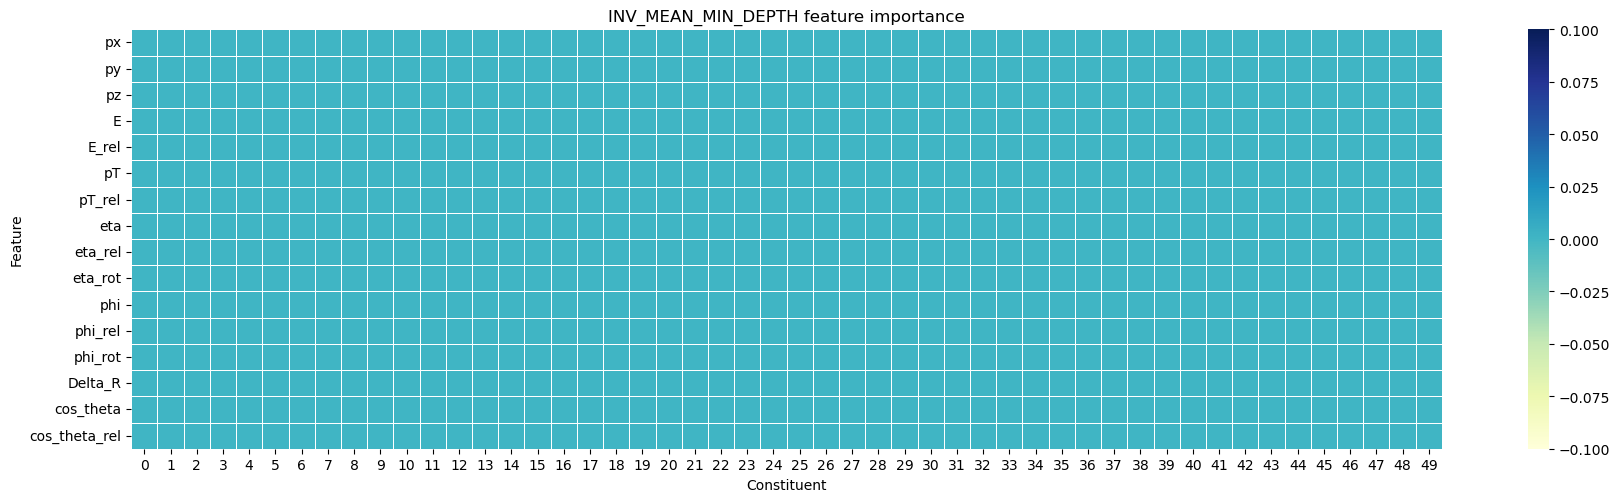

NUM_AS_ROOT


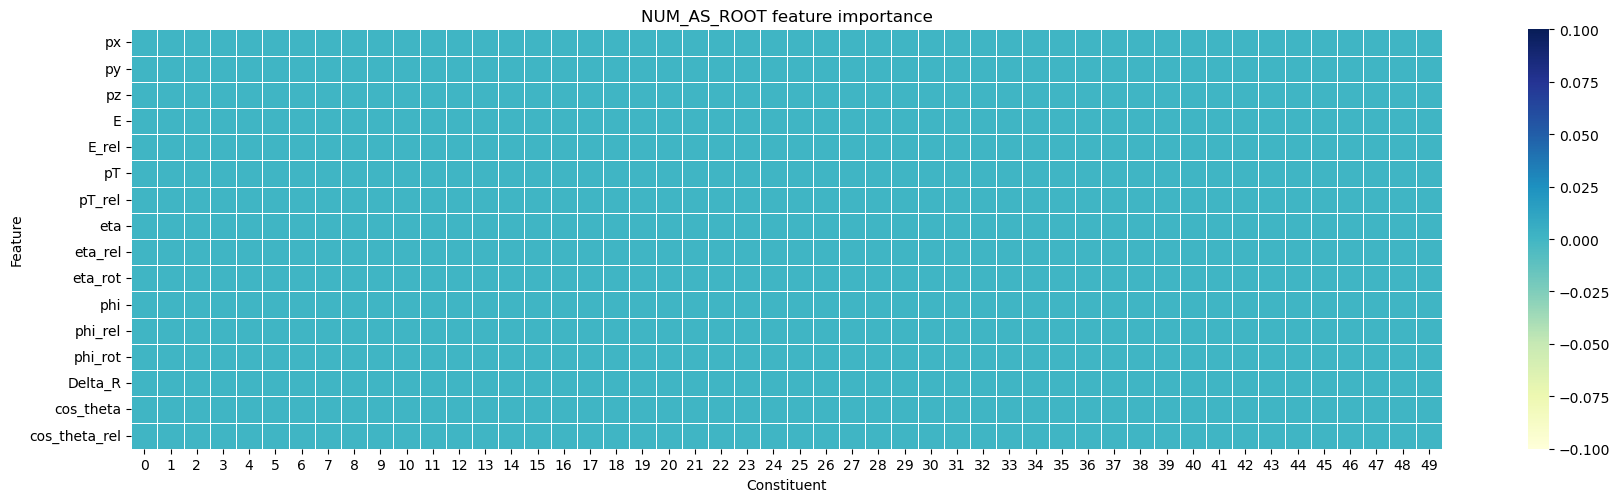

NUM_NODES


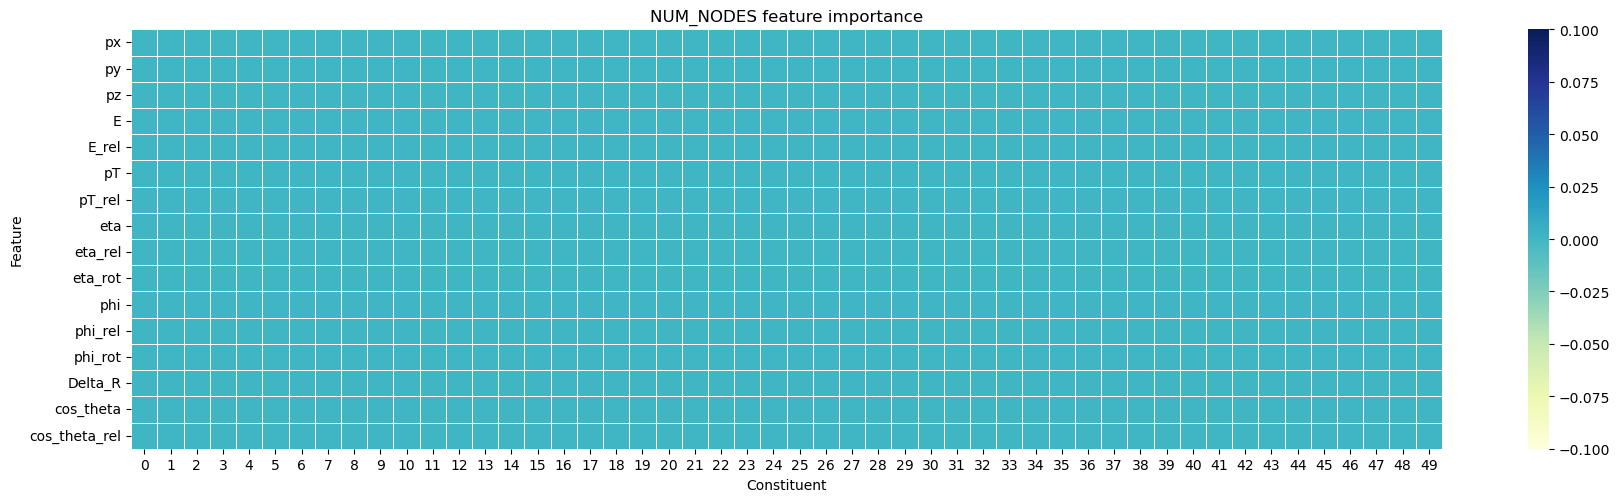

SUM_SCORE


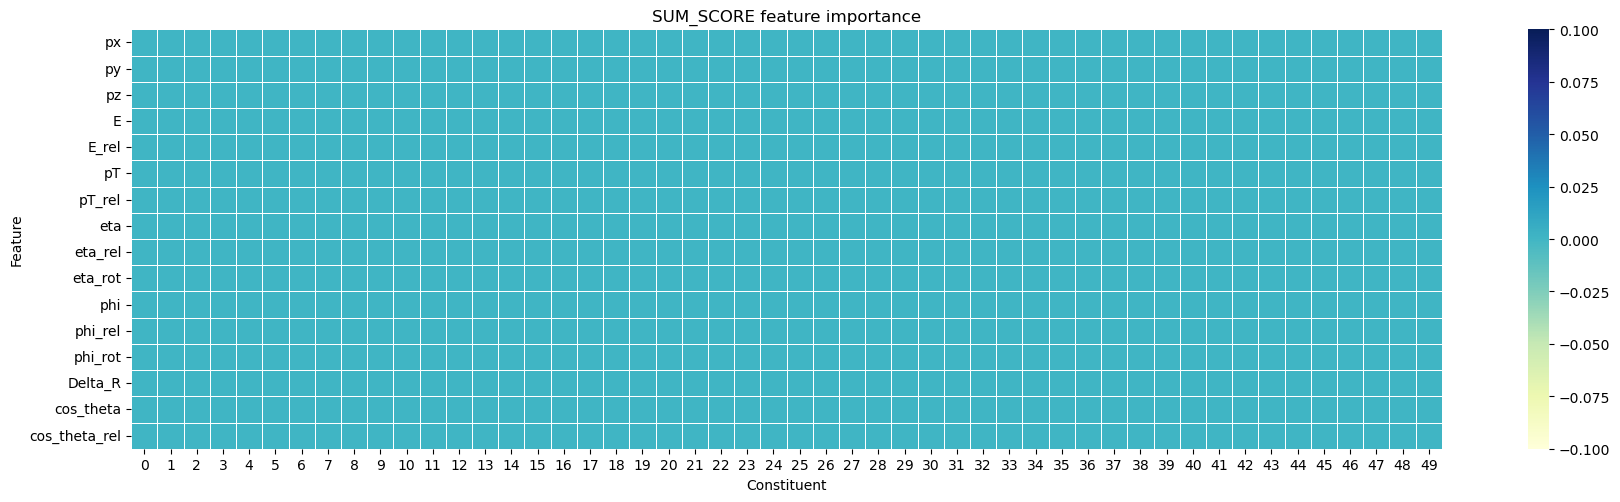

In [104]:
importances  = ['INV_MEAN_MIN_DEPTH', 'NUM_AS_ROOT', 'NUM_NODES', 'SUM_SCORE']

for importance in importances:
    print(importance)
    plot_importances("/Users/andrewoliver/Documents/HEP Masters/ETH/Masters Project/Testing/Models/model_initial_c50_pt2.0_jedinet", 
                     importance, show_fig = True,
                     save_fig = True, fig_name = "test_50")

In [7]:
new_inspector = tfdf.inspector.make_inspector("Models/BDT_name_test/assets/")
feature_list_SUM_SCORE = [new_inspector.variable_importances()['SUM_SCORE'][i][0][0] for i in range(len(new_inspector.variable_importances()['SUM_SCORE']))]
feature_list_SUM_SCORE.index('c0_pT')

111

In [29]:
alt_list_SUM_SCORE = [i[0][0] for i in new_inspector.variable_importances()['SUM_SCORE']]
# alt_list_SUM_SCORE[111]

In [30]:
SUM_SCORE_dict = {i[0][0]: i[1] for i in new_inspector.variable_importances()['SUM_SCORE']}
print(SUM_SCORE_dict)

{'c0_Delta_R': 63675.18042945862, 'c1_Delta_R': 42445.48713970184, 'c3_Delta_R': 34764.43838119507, 'c4_phi_rot': 33587.72777366638, 'c1_phi_rot': 31638.207044124603, 'c6_phi_rot': 23876.580218553543, 'c10_phi_rot': 22852.295475006104, 'c14_pT': 21677.209259986877, 'c4_eta_rel': 19517.460788726807, 'c7_Delta_R': 17199.91233062744, 'c8_phi_rot': 16892.59173297882, 'c15_Delta_R': 15932.093589782715, 'c4_phi_rel': 15252.305397033691, 'c5_E_rel': 14579.448732376099, 'c7_eta_rot': 14548.131271958351, 'c6_px': 14466.60004234314, 'c11_Delta_R': 14140.143162727356, 'c2_phi_rot': 13674.180543899536, 'c12_phi_rot': 13652.91135597229, 'c11_py': 13176.703435897827, 'c3_eta_rel': 12936.484847068787, 'c5_phi_rel': 12755.391427993774, 'c2_Delta_R': 11871.460938692093, 'c13_eta_rel': 11236.229035377502, 'c14_Delta_R': 10941.187519073486, 'c5_eta_rot': 10694.060084342957, 'c5_cos_theta_rel': 10605.850169181824, 'c9_phi_rot': 10513.597823143005, 'c2_eta_rel': 10507.192639827728, 'c13_cos_theta_rel': 104

In [31]:
SUM_SCORE_dict['c0_pT']

3389.6413745880127

In [28]:
new_inspector.variable_importances()['SUM_SCORE']

[("c0_Delta_R" (1; #1), 63675.18042945862),
 ("c1_Delta_R" (1; #113), 42445.48713970184),
 ("c3_Delta_R" (1; #145), 34764.43838119507),
 ("c4_phi_rot" (1; #173), 33587.72777366638),
 ("c1_phi_rot" (1; #125), 31638.207044124603),
 ("c6_phi_rot" (1; #205), 23876.580218553543),
 ("c10_phi_rot" (1; #29), 22852.295475006104),
 ("c14_pT" (1; #89), 21677.209259986877),
 ("c4_eta_rel" (1; #167), 19517.460788726807),
 ("c7_Delta_R" (1; #209), 17199.91233062744),
 ("c8_phi_rot" (1; #237), 16892.59173297882),
 ("c15_Delta_R" (1; #97), 15932.093589782715),
 ("c4_phi_rel" (1; #172), 15252.305397033691),
 ("c5_E_rel" (1; #179), 14579.448732376099),
 ("c7_eta_rot" (1; #216), 14548.131271958351),
 ("c6_px" (1; #206), 14466.60004234314),
 ("c11_Delta_R" (1; #33), 14140.143162727356),
 ("c2_phi_rot" (1; #141), 13674.180543899536),
 ("c12_phi_rot" (1; #61), 13652.91135597229),
 ("c11_py" (1; #47), 13176.703435897827),
 ("c3_eta_rel" (1; #151), 12936.484847068787),
 ("c5_phi_rel" (1; #188), 12755.39142799

In [15]:
corr_mtx = train_df.corr()

/var/folders/w6/ywy355d53p1fqw8pn8ng6xn80000gn/T/ipykernel_4042/1192556702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = train_df.corr()


In [27]:
corr_mtx.loc[['c0_px', 'c0_py']][['c0_pz', 'c0_pT']]

,c0_pz,c0_pT
c0_px,0.000539,0.077915
c0_py,0.015741,-0.040511


In [31]:
test_array = corr_mtx.loc[['c0_px', 'c0_py']][['c0_pz', 'c0_pT']].to_numpy()

In [32]:
print(test_array)

[[ 0.00053898  0.07791468]
 [ 0.01574122 -0.04051136]]


In [35]:
a = [[1,2],[3,4]]
b = [[7,9],[3,1]]
c = [[1,1],[3,10]]

In [37]:
d = np.mean( np.array([ a, b, c]), axis=0 )
print(d)

[[3. 4.]
 [3. 5.]]


In [47]:
e = np.zeros((3,2,2))
print(e)

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


In [49]:
e[0] = a
e[1] = b
e[2] = c
print(e)

[[[ 1.  2.]
  [ 3.  4.]]

 [[ 7.  9.]
  [ 3.  1.]]

 [[ 1.  1.]
  [ 3. 10.]]]


In [105]:
print(np.mean(e, axis = 0))

[[3. 4.]
 [3. 5.]]


In [4]:
from prepare_data_BDT import select_feature_labels

corr_mtx = train_df.corr()
corr_mtx_per_const = np.zeros((16,16,16))
feature_list = select_feature_labels('jedinet')

for i in range(16):
    features = [f'c{i}_{feature}' for feature in feature_list]
    corr_mtx_per_const[i] = corr_mtx.loc[features][features].to_numpy()

/var/folders/w6/ywy355d53p1fqw8pn8ng6xn80000gn/T/ipykernel_5521/2226245834.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtx = train_df.corr()


In [5]:
avg_corr_mtx = np.mean(corr_mtx_per_const, axis = 0)

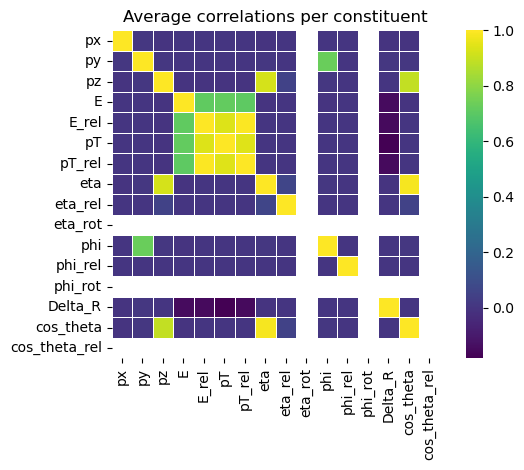

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(avg_corr_mtx, linewidth=0.5, cmap = 'viridis', yticklabels = feature_list, xticklabels = feature_list, square = True)
ax.set(title=f'Average correlations per constituent')
plt.tight_layout()
plt.savefig('Plots/Avg_correlations.pdf')
plt.show()

In [7]:
nanmean_corr_mtx =  np.nanmean(corr_mtx_per_const, axis = 0)

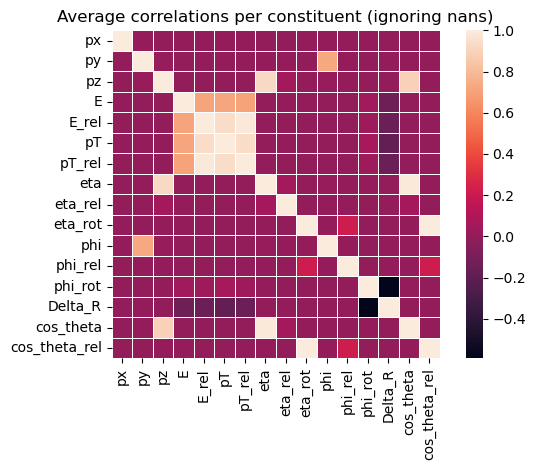

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(nanmean_corr_mtx, linewidth=0.5, yticklabels = feature_list, xticklabels = feature_list, square = True)
ax.set(title=f'Average correlations per constituent (ignoring nans)')
plt.tight_layout()
plt.savefig('Plots/Avg_correlations_nonan.pdf')
plt.show()

In [1]:
importances  = ['INV_MEAN_MIN_DEPTH', 'NUM_AS_ROOT', 'NUM_NODES', 'SUM_SCORE']
type(importances)

list